# PROJECT TOPIC

We are working as a car salesman and you would like to develop a model to predict the total dollar amount that customers are willing to pay given the following attributes: 
- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary 
- Credit Card Debt 
- Net Worth 

The model should predict: 
- Car Purchase Amount 

# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# STEP #1: IMPORT DATASET

In [2]:
dataset = pd.read_csv('Car_Purchasing_Data.csv', encoding= 'ISO-8859-1')

In [3]:
dataset

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


# STEP #2: VISUALIZE DATASET

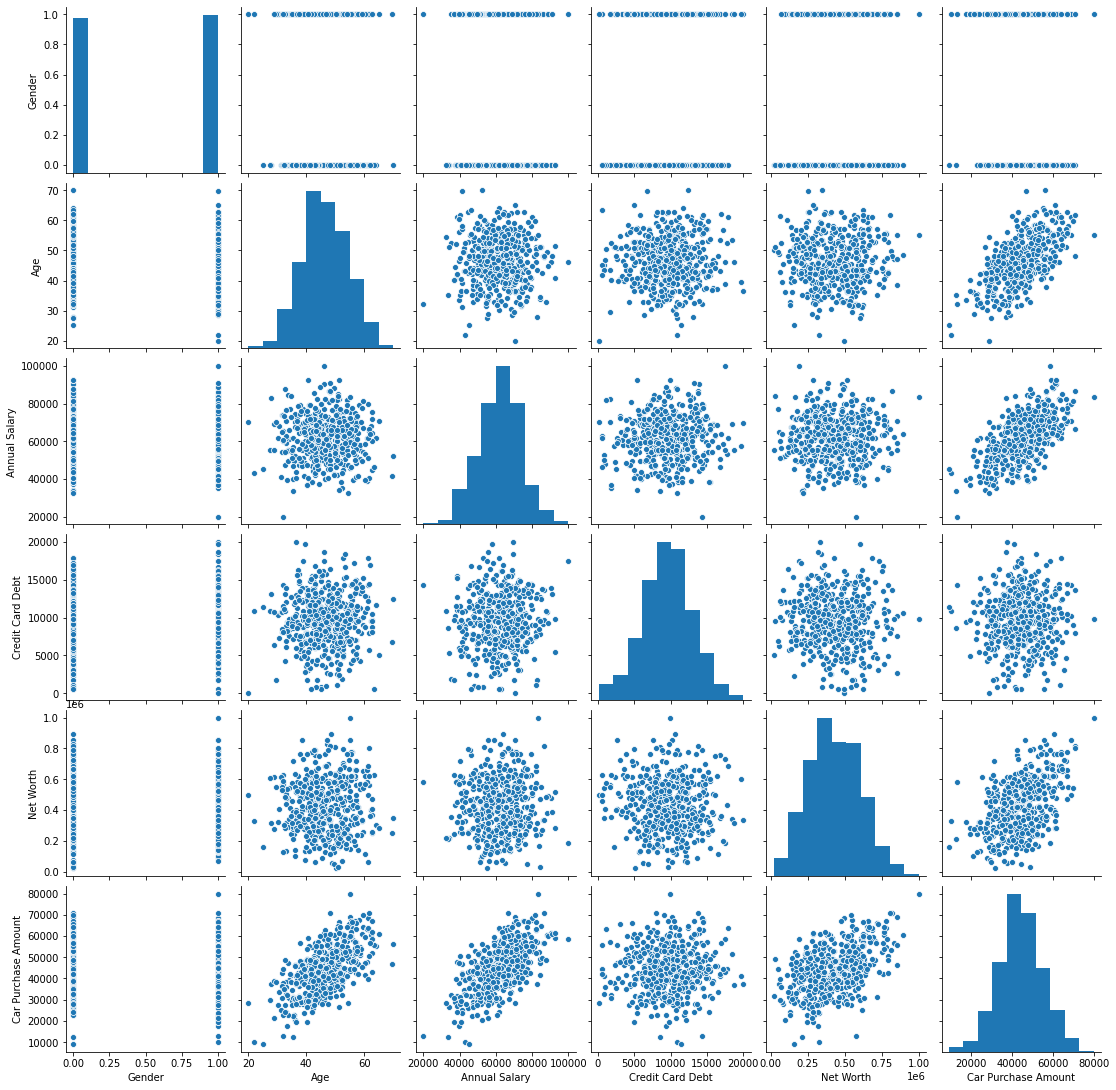

In [4]:
sns.pairplot(dataset)

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [5]:
X = dataset.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)

In [6]:
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [7]:
y = dataset['Car Purchase Amount']

In [8]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [9]:
X.shape

(500, 5)

In [10]:
y.shape

(500,)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)

In [12]:
X_sc

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [13]:
X_sc.shape

(500, 5)

In [14]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [15]:
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [16]:
y = y.values.reshape(-1,1)

In [17]:
y_sc = scaler.fit_transform(y)

In [18]:
y_sc

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

# STEP#4: TRAINING THE MODEL

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y_sc, test_size = 0.25)

In [20]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [21]:
model = Sequential()
model.add(Dense(25, input_dim = 5, activation= 'relu'))
model.add(Dense(25, activation= 'relu'))
model.add(Dense(1, activation= 'linear'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [24]:
epoch_hist = model.fit(X_train, y_train, epochs= 10, batch_size= 50, verbose= 1, validation_split= 0.2)

Train on 300 samples, validate on 75 samples
Epoch 1/10
300/300 [==============================] - 0s 1ms/step - loss: 0.1761 - val_loss: 0.1383
Epoch 2/10
300/300 [==============================] - 0s 40us/step - loss: 0.1012 - val_loss: 0.0740
Epoch 3/10
300/300 [==============================] - 0s 43us/step - loss: 0.0515 - val_loss: 0.0375
Epoch 4/10
300/300 [==============================] - 0s 41us/step - loss: 0.0279 - val_loss: 0.0232
Epoch 5/10
300/300 [==============================] - 0s 39us/step - loss: 0.0213 - val_loss: 0.0201
Epoch 6/10
300/300 [==============================] - 0s 39us/step - loss: 0.0199 - val_loss: 0.0175
Epoch 7/10
300/300 [==============================] - 0s 38us/step - loss: 0.0164 - val_loss: 0.0128
Epoch 8/10
300/300 [==============================] - 0s 39us/step - loss: 0.0114 - val_loss: 0.0092
Epoch 9/10
300/300 [==============================] - 0s 41us/step - loss: 0.0083 - val_loss: 0.0077
Epoch 10/10
300/300 [==========================

# STEP#5: EVALUATING THE MODEL 

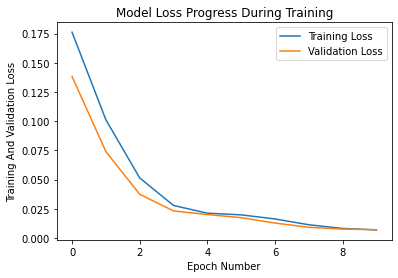

In [25]:
plt.plot(epoch_hist.history['loss'])
plt.plot(epoch_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training And Validation Loss')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [26]:
X_t = np.array([[1, 50, 50000, 10000, 600000]])
y_pred = model.predict(X_t) 

In [27]:
print(y_pred)

[[31128.02]]


# Our model predicted Car Purchase Amount